# Tests on One or Two Mean Vectors

- Rencher의 다변량 통계학의 정리 및 R로의 구현<br>
- 다변량 통계학에서의 두 집단 간의 비교

목차<br>
    1. 평균 수준 검정
    2. 두 집단의 비교
    3. 가설을 기각하는데의 기여도
    4. Paired Observation Test
    5. TEST FOR ADDITIONAL INFORMATION
    6. PROFILE ANALYSIS

 MULTIVARIATE VERSUS UNIVARIATE TESTS

1. Multivariate test에서는 변수 간에 correlation까지 고려해야 되서 parameter의 갯수가 훨씬 많아 Univariate일 때 보다 복잡<br>
Mulitivariate Normal의 파라미터 수 = Mean +Variance + Correlation= $p+p+pC_{2}$<br>
2. p번의 Univariate test 보다 power가 높음<br>

# 1. 평균 수준 검정

<b>1.TESTS ON $\mu$ WITH $\Sigma$ KNOWN</b>

<b>1) 일변량</b>

$H_{0}:\mu=\mu_{0}$<br>
$H_{1}:\mu\neq \mu_{0}$<br>
<br>
Random samples of n observation: $y_{1},...,y_{n} \sim N(\mu,\sigma^{2})$<br>
Test statistic: $z=\frac{\bar{y}-\mu_{0} }{\sigma /\sqrt{n}} \sim N(0,1) $ Under $H_{0}$<br>
<=> $z \sim \chi^{2}_{1}$<br>

<b>2) 다변량</b>

$\mu=\begin{bmatrix}\mu_{1} \\
... \\ \mu_{p}\end{bmatrix}$ $\mu_{0}=\begin{bmatrix}\mu_{01} \\
... \\ \mu_{0p}\end{bmatrix}$
<br>
$H_{0}:\mu=\mu_{0}$<br>
$H_{1}:\mu\neq \mu_{0}$<br>
<=><br>
$H_{0}: \mu_{j}=\mu_{0j}$ for all $j$<br>
$H_{1}: \mu_{j}\neq \mu_{0j}$ at least one $j$<br>
<br>
Random samples of n observation: $y\sim N_{p}(\mu, \Sigma)$<br>
Test statistic: $Z^{2}= n(\bar{y}-\mu_{0})^{'}\Sigma^{-1}(\bar{y}-\mu_{0}) \sim \chi^{2}_{p}$ Under $H_{0}$<br>

   


<b>2. TESTS ON $\mu$ WITH $\Sigma$ UNKNOWN</b>

<b>1) 일변량</b>

$H_{0}:\mu=\mu_{0}$<br>
$H_{1}:\mu\neq \mu_{0}$<br>
<br>
Random samples of n observation: $y_{1},...,y_{n} \sim N(\mu,\sigma^{2})$<br>
Test statistic: $t=\frac{\bar{y}-\mu_{0} }{s /\sqrt{n}} \sim t_{n-1} $ Under $H_{0}$<br>
<=> $t^{2}_{n-1} =F_{1, n-1}$<br>
Reject $H_{0}$ if $|t|>t_{\alpha/2, n-1}$

<b>2) 다변량: Hotelling's $T^{2}$-Test</b>

$\mu=\begin{bmatrix}\mu_{1} \\
... \\ \mu_{p}\end{bmatrix}$ $\mu_{0}=\begin{bmatrix}\mu_{01} \\
... \\ \mu_{0p}\end{bmatrix}$
<br>
$H_{0}:\mu=\mu_{0}$<br>
$H_{1}:\mu\neq \mu_{0}$<br>
<=><br>
$H_{0}: \mu_{j}=\mu_{0j}$ for all $j$<br>
$H_{1}: \mu_{j}\neq \mu_{0j}$ at least one $j$<br>
<br>
Random samples of n observation: $y\sim N_{p}(\mu, \Sigma)$<br>
Test statistic: $T^{2}= n(\bar{y}-\mu_{0})^{'}S^{-1}(\bar{y}-\mu_{0}) \sim T^{2}$ Under $H_{0}$<br>
$T^{2}$는 $p$, $v=n-1$을 파라미터로 하는 Hotelling's t distribution<br>
$\frac{v-p+1}{vp}T^{2}_{p,v}=F_{p,v-p+1}, v=n-1$

Reject $H_{0}$ if $T^{2}>T^{2}_{\alpha, p, n-1}$<br>

   


$S^{-1}$이 nonsingular해야 되기 때문에 $n-1>p$여야 됨

<b>3) 예제</b>

In [1]:
setwd('C:/Users/bki19/desktop/Multivariate_data_analysis/data')

Calcium Data<br>
<br>
남부에서 10개지역의 토양과 turnip 등에서 calcium 측정<br>
변수1: available soil calcium<br>
변수2: exchangeable soil calcium<br>
변수3: turnip green calcium<br>
변수1, 2, 3의 바람직한 수준이 15,6,2.85일 때 바람직한 수준을 만족할까?

In [6]:
#load data
df<-read.table('./T3_4_CALCIUM.DAT',row.names=1)
df

V2,V3,V4
35,3.5,2.80
35,4.9,2.70
40,30.0,4.38
10,2.8,3.21
6,2.7,2.73
20,2.8,2.81
35,4.6,2.88
35,10.9,2.90
35,8.0,3.28
30,1.6,3.20


In [88]:
OneSampleHotelling<-function(df,mu,alpha=0.05){
n<-dim(df)[1]
p=dim(df)[2]
yhat=apply(df,2,mean)

T=n*t(yhat-mu)%*%solve(cov(df)  )%*%(yhat-mu)
v=n-1
F=((v*p)/(v-p+1))*qf(1-alpha,p,v-p+1)
Pval=((v*p)/(v-p+1))*(1-pf(F,p,v-p+1))
RESULT=data.frame(TestStatistic=T,CriticalValue=F ,  Pvalue=Pval   )
return (RESULT)
    }

In [51]:
mu <- c(15, 6,2.85)
alpha=0.05
OneSampleHotelling(df,mu,alpha)

TestStatistic,CriticalValue,Pvalue
24.55891,16.76635,0.005443825


$T^{2}=24.55891$, $T^{2}_{0.05,3,9}=16.766$으로 $H_{0}$를 기각<br>
=>변수 중에 바람직한 수준이 아닌 것이 최소 하나는 존재

# 2. 두 집단의 비교

<b>1) 일변량</b>

$H_{0}:\mu_{1}=\mu_{2}$<br>
$H_{1}:\mu_{1} \neq \mu_{2}$<br>
<br>
가정<br>
(1)Random samples of n observation:<br> 
$y_{11},...,y_{n_{1}} \sim N(\mu_{1},\sigma_{1}^{2})$<br>
$y_{21},...,y_{n_{2}} \sim N(\mu_{2},\sigma_{2}^{2})$<br>
(2) Two samples are independent<br>
(3) $\sigma_{1}^{2}=\sigma_{2}^{2}$<br>
Test statistic: $t=\frac{\bar{y}_{1}-\bar{y}_{2} }{s_{pl} \sqrt{\frac{1}{n_{1}}+\frac{1}{n_{2}}       }   } \sim t_{n_{1}+n_{2}-2} $ Under $H_{0}$<br>
pooled variance: $s_{pl}=\frac{(n_{1}-1  )s^{2}_{1}+(n_{2}-1  )s^{2}_{2}      }{  n_{1}+n_{2}-2      }  $

<=> $t^{2}_{n-1} =F_{1, n-1}$<br>
Reject $H_{0}$ if $|t|>t_{\alpha/2, n_{1}+n_{2}-2 }$

<b>2) 다변량</b>

$H_{0}:\mu=\mu_{0}$<br>
$H_{1}:\mu\neq \mu_{0}$<br>
<br>
(1) Random samples of n observation: <br>
$y_{11},..., y_{1n_{1}}\sim N_{p}(\mu_{1}, \Sigma_{1})$<br>
$y_{21},..., y_{2n_{2}}\sim N_{p}(\mu_{2}, \Sigma_{2})$<br>
(2) Two samples are independent<br>
(3) $\Sigma_{1}=\Sigma_{2}$<br>

Test statistic: $T^{2}= \frac{n_{1}n_{2}}{n_{1}+n_{2}}(\bar{y}_{1}-\bar{y}_{2})^{'}S^{-1}_{pl}(\bar{y}_{1}-\bar{y}_{2}) \sim T^{2}_{p,n_{1}+n_{2}+2}$ Under $H_{0}$<br>
$T^{2}$는 $p$, $v=n-1$을 파라미터로 하는 Hotelling's t distribution<br>
Reject $H_{0}$ if $T^{2}>T^{2}_{\alpha, p, n_{1}+n_{2}+2}$
   


$S^{-1}_{pl}$이 nonsingular해야 되기 때문에 $n_{1}+n_{2}+2>p$여야 됨

<b>3) 예제</b>

Psychological tests data<br>
32명의 남성과 32명의 여성에 대해 심리 실험을 진행<br>
변수1: pictorial inconsistencies <br>
변수2: paper form board <br>
변수3: tool recognitiony<br>
변수4: vocabulary<br>
남녀의 각각의 심리적 변수는 서로 같을까?

In [91]:
#load data
df<-read.table('./T5_1_PSYCH.DAT')
MEN<-df[df$V1==1,][,-1]
WOMEN<-df[df$V1==2,][,-1]

In [23]:
TwoSampleHotelling<-function(df1,df2,alpha=0.05){
    n1<-dim(df1)[1]
    n2<-dim(df2)[1]
    p=dim(df1)[2] ##same for both
    
    yhat1=apply(df1,2,mean)
    yhat2=apply(df2,2,mean)
    
    W1=(n1-1)*cov(df1)
    W2=(n2-1)*cov(df2)
    
    Sp=(1/(n1+n2-2))*(W1+W2)
    
    T=((n1*n2)/(n1+n2))*t(yhat1-yhat2)%*%solve(Sp)%*%(yhat1-yhat2)
    
    F=(((n1+n2-2)*p)/(n1+n2-p-1    ))*qf(1-alpha,p,n1+n2-p-1)
    Pval=(((n1+n2-2)*p)/(n1+n2-p-1    ))*(1-pf(F,p,n1+n2-p-1))
    RESULT=data.frame(TestStatistic=T,CriticalValue=F ,  Pvalue=Pval   )
    return (RESULT)
        }

In [24]:
alpha=0.01
TwoSampleHotelling(MEN,WOMEN,alpha)

TestStatistic,CriticalValue,Pvalue
97.6015,15.36323,4.842945e-08


$T^{2}=97.6015$, $T^{2}_{0.01,4,62}=15.36323$으로 $H_{0}$ 기각<br>
남녀간의 심리적 차이가 있는 변수가 최소한 하나는 있다

# 3. $H_{0}$ 기각하는데의 기여

$H_{0}:\mu_{1}=\mu_{2}$ 기각했을 때, $\mu_{1j}=\mu_{2j}$인 서로 같은 변수는 없을까?<br>
어떤 변수 간의 차이가 두 그룹의 차이에 기여하는지 보고 싶을때

$\alpha=\begin{bmatrix}\alpha_{1}\\
...\\
\alpha_{p}  \end{bmatrix}   $<br>
$\alpha^{'}y=\alpha_{1}y_{1}+...+\alpha_{p}y_{p}=z$<br>
<br>
$H_{0}: \alpha^{'}\mu_{z1}=\alpha^{'}\mu_{z2}$<br>
$H_{a}:$ 두 집단의 변수간의 linear combination을 다르게 하는 $\alpha$가 최소 하나 존재<br>
$t(\alpha)=\frac{\bar{z}_{1}-\bar{z}_{2} }{ \sqrt{ ( \frac{1}{n_{1}}+\frac{1}{n_{2}})s_{z}^{2}       }   } $<br>
$t(\alpha)=\frac{\alpha^{'}\bar{y}_{1}-\alpha^{'}\bar{y}_{2} }{ \sqrt{ ( \frac{(n_{1}+n_{2})}{n_{1}n_{2}  }  )\alpha^{'}S_{pl} \alpha       }   } $<br>
$t(\alpha)$가 음수가 될 수 있기 때문에 $t^{2}(\alpha)$에 대해서 보면 $\bar{y}_{1}-\bar{y}_{2}$가 최대가 되기 위해서는 같은 방향으로 projection해야 되므로<br>
$\alpha=S^{-1}_{pl}(\bar{y}_{1}-\bar{y}_{2}  )$ 이때 $z=\alpha^{'}y$를 discriminant function이라고 함<br>
<br>
따라서 만약 $H_{0}:\mu=\mu_{0}$이 기각 되면 discriminant function $\alpha^{'}y$은 $H_{0}: \alpha^{'}\mu_{z1}=\alpha^{'}\mu_{z2}$를 기각하게 만듦<br>
이 때 $\alpha_{j}$를 보고 $H_{0}$를 기각하는데 기여한 $y_{j}$를 볼 수 있음


In [2]:
#load data
df<-read.table('./T5_1_PSYCH.DAT')
MEN<-df[df$V1==1,][,-1]
WOMEN<-df[df$V1==2,][,-1]

In [3]:
Contribution<-function(df1,df2){
    n1<-dim(df1)[1]
    n2<-dim(df2)[1]
    p=dim(df1)[2] ##same for both
    
    yhat1=apply(df1,2,mean)
    yhat2=apply(df2,2,mean)
    
    W1=(n1-1)*cov(df1)
    W2=(n2-1)*cov(df2)
    
    Sp=(1/(n1+n2-2))*(W1+W2)
    
    A=solve(Sp)%*%(yhat1-yhat2)
    RESULT=data.frame(alpha=A  )
    return (RESULT)
        }

In [4]:
Contribution(MEN,WOMEN)

,alpha
V2,0.5104227
V3,-0.2032933
V4,0.4660420
V5,-0.3096697


$\alpha_{'}y=0.5104227y_{1}-0.2032933y_{2}+0.4660420y_{3}-0.3096697y_{4}$<br>
남녀의 차이가 발생하는데 변수 1과 변수 3이 크게 기여

# 4. Paired Observation Test

- 두 표본이 independent 하지 않은 paired observation인 경우
- 같은 대상에 대해 두 번 측정 했을 때
- 같은 기준에 의해 두 대상을 비교할 때 (예를 들어, IQ, 집안 배경)
- sampling pairing 간에 correlation이 있을 때 Two-sample test로 independent 하다고 가정해버리면 Test statistic이 t분포를 따르지 않게 되어 실제 t-value를 underestimate 해버림
- 두 집단의 variance가 같다는 가정 필요 없어짐

<b>1) 일변량</b>

$(y,x)\sim N_{2}(\mu=\begin{bmatrix}\mu_{y} \\
\mu_{x}\end{bmatrix}$,$\Sigma=\begin{bmatrix}\sigma_{y}^{2} &\sigma_{yx}\\
\sigma_{yx} & \sigma_{x}^{2}  \end{bmatrix}   $  )<br>
<br>
$d_{i}=y_{i}-x_{i}\sim N(\mu_{y}-\mu_{x}, \sigma^{2}_{d} )$, 여기서 $\sigma^{2}_{d}=\sigma^{2}_{y}-2\sigma_{y}\sigma_{x}+\sigma^{2}_{x}$<br>
<br>
$H_{0}:\mu_{x}=\mu_{y}$<br>
$H_{1}:\mu_{x} \neq \mu_{y}$<br>
<=><br>
$H_{0}:\mu_{d}=0$<br>
$H_{1}:\mu_{d} \neq 0$<br>
<br>
Test statistic: $t=\frac{\bar{y}_{1}-\bar{y}_{2} }{\sqrt{ (s_{y}^{2}+s_{x}^{2}-2s_{yx})/n      }   }= \frac{\bar{d} }{s_{d}/\sqrt{n}  }  \sim t_{n-1} $ Under $H_{0}$<br>


<b>2) 다변량</b>

$(y,x)\sim N_{2p}(\begin{bmatrix}\mu_{y} \\
\mu_{x}\end{bmatrix}$,$\begin{bmatrix}\Sigma_{yy} &\Sigma_{yx}\\
\Sigma_{xy} & \Sigma_{xx}  \end{bmatrix}   $  )<br>
<br>
$H_{0}:\mu_{d}=0$<br>
$H_{1}:\mu_{d} \neq 0$<br>
<br>
$\bar{d}= \frac{1}{n} \sum_{i=1}^{n}d_{i}$, $S_{d}= \frac{1}{n-1} \sum_{i=1}^{n}(d_{i}-\bar{d})(d_{i}-\bar{d})^{'}$<br>
<br>
Test statistic: $T^{2}=\bar{d}^{'}(\frac{S_{d}  }{n})^{-1}\bar{d}  \sim T^{2}_{p,n-1} $ Under $H_{0}$<br>
Reject $H_{0}$ if $T^{2}>T^{2}_{\alpha, p, n-1}$

<b>3) 예제 </b> 

coating for resistance to corrosion data<br>
부식에 대해 두 종류의 코팅이 얼마나 버티는지 보고 싶어함<br>
15개의 장소에 파이프를 2개씩 묻고 같은 시간 동안 두 종류의 변수를 측정<br>
<br>
y1 = maximum depth of pit in thousandths of an inch,<br>
y2 = number of pits 

In [11]:
#load data
df<-read.table('./T5_3_PIPE.txt',sep=' ',row.names=1)
X<-df[,c(1,2)]
Y<-df[,c(3,4)]

In [16]:
Pairwise<-function(df1,df2,alpha=0.05){
    n<-dim(df1)[1]
    p=dim(df1)[2] ##same for both
    
    D=df1-df2
    dhat=apply(D,2,mean)
        
    T=n*t(dhat)%*%solve(cov(D))%*%dhat
    
    
    v=n-1
    F=((v*p)/(v-p+1))*qf(1-alpha,p,v-p+1)
    Pval=((v*p)/(v-p+1))*(1-pf(F,p,v-p+1))
    RESULT=data.frame(TestStatistic=T,CriticalValue=F ,  Pvalue=Pval   )
    return (RESULT)
        }

In [17]:
Pairwise(X,Y,0.05)

TestStatistic,CriticalValue,Pvalue
10.8189,8.196602,0.01072115


$T^{2}=10.8189$, $T^{2}_{0.05,2,14}=8.196602$으로 $H_{0}$ 기각<br>
두 코팅 방법은 부식한 효과에 차이가 있음

#  5. TEST FOR ADDITIONAL INFORMATION

두 그룹을 나누는데 필요 없는 변수가 있을까?

$y\in R^{p}$, $x\in R^{q}$<br>
두 샘플이 같은 covariance matrix를 가진 MVN에서 나왔다고 가정<br>
$\begin{bmatrix}y_{11} \\
x_{11}\end{bmatrix},...,\begin{bmatrix}y_{n1} \\
x_{n1}\end{bmatrix}\sim N_{p+q}(\mu_{1},\Sigma)$<br>
$\begin{bmatrix}y_{21} \\
x_{21}\end{bmatrix},...,\begin{bmatrix}y_{n2} \\
x_{n2}\end{bmatrix}\sim N_{p+q}(\mu_{2},\Sigma)$<br>

$H_{0}:x_{1},x_{2} $  redundant for separating two groups<br>
$x$가 스스로 두 그룹을 나눌 수 있는지 보는게 아니라 $y$로 이미 두 그룹을 나눌 수 있을 때 $x$가 추가적인 정보를 줄 수 있는지 보는 것

Full set of $p+q$ variables<br>
$T^{2}_{p+q}= \frac{n_{1}n_{2}}{n_{1}+n_{2}}(\begin{bmatrix} \bar{y}_{1} \\
\bar{x}_{1} \end{bmatrix}  -\begin{bmatrix} \bar{y}_{2} \\
\bar{x}_{2} \end{bmatrix}  )^{'}S^{-1}_{pl}(\begin{bmatrix} \bar{y}_{1} \\
\bar{x}_{1} \end{bmatrix}  -\begin{bmatrix} \bar{y}_{2} \\
\bar{x}_{2} \end{bmatrix}  )$<br>
<br>
Reduced set of $p$ variables<br>
$T^{2}_{p}= \frac{n_{1}n_{2}}{n_{1}+n_{2}}(\bar{y}_{1}-\bar{y}_{2})^{'}S^{-1}_{yy}(\bar{y}_{1}-\bar{y}_{2})$<br>
<br>
$T^{2}_{p}$에서 $T^{2}_{p+q}$으로의 the significance of the increase <br>
$T^{2}(x|y)=(v-p)\frac{T^{2}_{p+q}-T^{2}_{p}  }{v+T^{2}_{p}} \sim T^{2}_{q,v-p}$<br>
Reject $H_{0}$ if $T^{2}(x|y)>T^{2}_{\alpha,q,v-p}$


In [21]:
#load data
df<-read.table('./T5_1_PSYCH.DAT')
MEN<-df[df$V1==1,][,-1]
WOMEN<-df[df$V1==2,][,-1]

3번째 4번째 변수가 추가 됐을 때 유의한지 검증

<b>예제</b>

In [117]:
Additional_info<-function(df1,df2,Test,alpha=0.05){
    T1<-TwoSampleHotelling(df1,df2,alpha)[1,1]
    T2<-TwoSampleHotelling(df1[,-Test],df2[,-Test],alpha )[1,1]
    
    n=dim(df1)[1]
    p=dim(df1[,-Test])[2]
    q=dim(df1)[2]-dim(df1[,-Test])[2]
    v=n*2-2
    
    T<-(v-p)*(T1-T2  )/(v+T2)
    F= (v-p)*( q/(v-p-q+1) )*(qf(1-alpha,q,v-p-q+1))
    Pval=(v-p)*( q/(v-p-q+1) )*(1-pf(F,q,v-p-q+1 ))
    
    RESULT=data.frame(TestStatistic=T,CriticalValue=F, Tp=T2,P_val=Pval   )
    return (RESULT)
        }

In [118]:
Additional_info(MEN,WOMEN,c(3,4),0.01)

TestStatistic,CriticalValue,Tp,P_val
42.95478,10.13711,31.01258,0.0003342493


$T^{2}=42.95478$, $T^{2}_{0.01,2,60}=10.13711$으로 $H_{0}$ 기각<br>
3번째 4번째 변수는 두 그룹을 나누는데 추가적인 정보를 제공

각 변수 하나하나는 추가적인 정보를 제공할까?

In [122]:
ADD=c()
for (i in 1:4){
    ADD=rbind(ADD,Additional_info(MEN,WOMEN,i,0.01)[,c('Tp', 'TestStatistic')] )

}

ADD

Tp,TestStatistic
78.87327,7.843683
90.83479,2.612203
32.62530,40.513431
74.59261,9.938490


2번째 변수를 뺐을 때만 통계량이 작아짐<br>
3번째 변수가 가장 크게 기여

# 6. PROFILE ANALYSIS

<b>1) One-sample</b>

$y\sim N_{p}(\mu, \Sigma)$일 때, 만약 y가 $p$번 연속 측정 됐다면 (Repeated measurement) $\mu_{1},..\mu_{p}$를 비교해보고 싶음<br>
Profile: $(1,\mu_{1}),..(p,\mu_{p})$를 plot에 찍고 연결한 점

Profile이 같은지 검정(flat한지 혹은 level인지)<br>
$H_{0}:\mu_{1}=,..=\mu_{p}$<br>
$y_{1},..,y_{p}$는 independent할 수 없음<br>


$H_{0}: \begin{bmatrix} \mu_{1}-\mu_{2} \\
...\\
\mu_{p-1}-\mu_{p} \end{bmatrix}$=$\begin{bmatrix} 0 \\
...\\
0 \end{bmatrix}$<br>
<br>
$H_{0}:C\mu=0$<br>
where $C=\begin{bmatrix} 1 & -1 & 0 &... \\
 0 & 1 & -1 &...\\ 
...\\
 0 & 0 & 0 &..-1  \end{bmatrix}$

<b>2) Two-sample</b>

Parellelism Hypothesis<br>
<br>
두 profile이 평행인지 (기울기가 같은지)<br>
$H_{01}$: $\begin{bmatrix} \mu_{12}-\mu_{11} \\
\mu_{13}-\mu_{12}\\
...\\
\mu_{1p}-\mu_{1,p-1} \end{bmatrix}$=$\begin{bmatrix} \mu_{22}-\mu_{21} \\
\mu_{23}-\mu_{22}\\
...\\
\mu_{2p}-\mu_{2,p-1} \end{bmatrix}$<br>
<br>
$H_{0}:C\mu_{1}=C\mu_{2}$<br>
where $C=\begin{bmatrix} -1 & 1 & 0 &... \\
 0 & -1 & 1 &...\\ 
...\\
 0 & 0 & 0 &..1  \end{bmatrix}$<br>
 <br>
Test Statistic: $T^{2}= \frac{n_{1}n_{2}}{n_{1}+n_{2}}(\bar{y}_{1}-\bar{y}_{2})^{'}C^{'}[CS_{pl}C^{'}]^{-1}C(\bar{y}_{1}-\bar{y}_{2})\sim T^{2}_{p-1,n_{1}+n_{2}-2 }$<br>
$p$는 $C$의 row의 갯수

두 그룹의 level은 같을까?<br>
$H_{02}:\frac{\mu_{11}=,..=\mu_{1p}}{p}=\frac{\mu_{21}=,..=\mu_{2p}}{p}  $<br>
<=><br>
$H_{02}: j^{'}\mu_{1}=j^{'}\mu_{2}$<br>
<br>
Test statistic: $t=\frac{j^{'}( \bar{y}_{1}-\bar{y}_{2} )   }{ \sqrt{j^{'}S_{pl}j(1/n_{1}+1/n_{2}  )  }     }$<br>
reject $H_{02}$ if $|t|>t_{\alpha/2, n_{1}+n_{2} }$<br>

Profile은 flat 할까?<br>
$H_{03}:\frac{\mu_{11}+\mu_{21}}{2}=...=\frac{\mu_{1p}=,..=\mu_{2p}}{2}  $<br>
<=><br>
$H_{03}: \frac{1}{2} C(\mu_{1}+\mu_{2})=0$<br>
<br>
Test statistic: $T^{2}=(n_{1}+n_{2})(C\bar{y} )^{'} (CS_{pl}C^{'}   )^{-1}C\bar{y}  \sim T^{2}_{p-1,n_{1}+n_{2}+2}$ when $H_{01}$,$H_{03}$ both true

<b> 3) 예제</b>

In [123]:
#load data
df<-read.table('./T5_1_PSYCH.DAT')
MEN<-df[df$V1==1,][,-1]
WOMEN<-df[df$V1==2,][,-1]

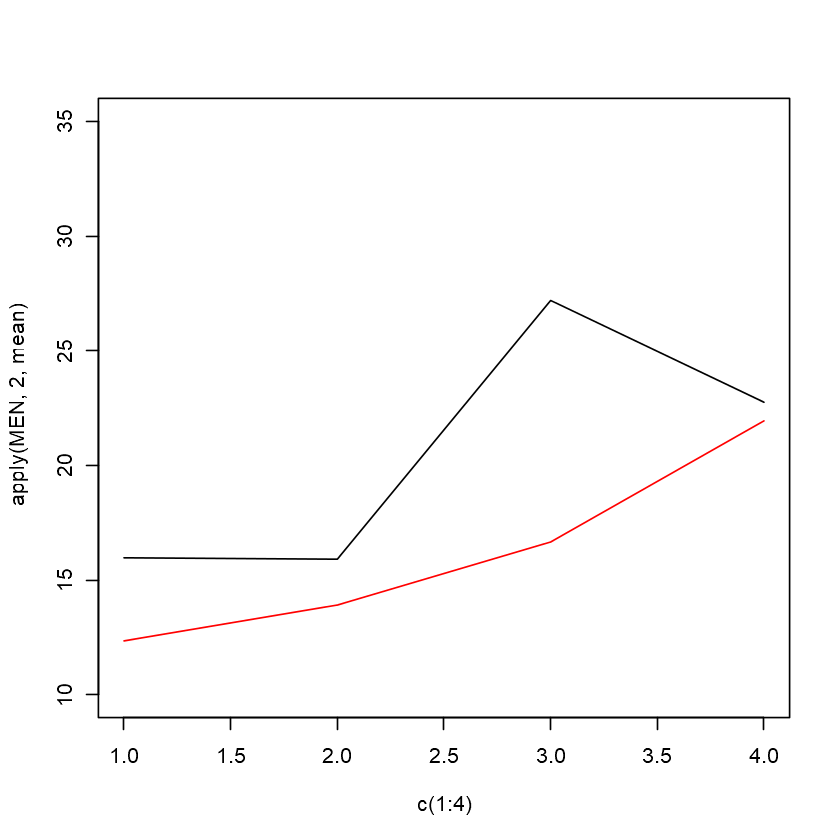

In [127]:
plot(c(1:4),apply(MEN,2,mean),type='l',ylim=c(10,35))
lines(c(1:4),apply(WOMEN,2,mean),col='red')

검정색은 남자의 평균, 빨강색은 여자의 평균으로 plot을 봤을 때는 parallelism이 없어 보임

<b>Parallel test</b>

In [140]:
ContrastMatrix=function(a,b){
    A=matrix(0,nrow=a,ncol=b)
    for (i in 1:a){
        A[i,i]<-1
        A[i,i+1]<- -1
    }
    return (A)
}


In [153]:
Parellelism<-function(df1,df2,alpha=0.05){
    n1<-dim(df1)[1]
    n2<-dim(df2)[1]
    p=dim(df1)[2] ##same for both
    
    yhat1=apply(df1,2,mean)
    yhat2=apply(df2,2,mean)
    
    W1=(n1-1)*cov(df1)
    W2=(n2-1)*cov(df2)
    
    Sp=(1/(n1+n2-2))*(W1+W2)
    
    C=ContrastMatrix(p-1,p)
    
    
    T=((n1*n2)/(n1+n2))*t(yhat1-yhat2)%*%t(C)%*%solve(C%*%Sp%*%t(C))%*%C%*%(yhat1-yhat2)
    p=p-1
    F=(((n1+n2-2)*p)/(n1+n2-p-1    ))*qf(1-alpha,p,n1+n2-p-1)
    Pval=(((n1+n2-2)*p)/(n1+n2-p-1    ))*(1-pf(F,p,n1+n2-p-1))
    RESULT=data.frame(TestStatistic=T,CriticalValue=F ,  Pvalue=Pval   )
    return (RESULT)
        }

In [154]:
Parellelism(MEN,WOMEN,0.01)

TestStatistic,CriticalValue,Pvalue
74.24037,12.79026,4.491991e-06


$T^{2}=74.24037$, $T^{2}_{0.01,3,62}=12.79026$으로 $H_{0}$ 기각하여 두 집단의 차이는 평행하지 않다

In [161]:
Contribution ( as.matrix(WOMEN)%*%t(ContrastMatrix(3,4)),as.matrix(MEN)%*%t(ContrastMatrix(3,4)) )

alpha
-0.1356086
0.1043403
-0.3631646


Contribution을 봤을 때 가설을 기각하는데 세 번째 부분에서의 기여도가 높음<br>
즉 3번째와 4번째의 기울기가 같지 않음

<b>Equal level test</b>

In [169]:
alpha=0.01
sqrt(TwoSampleHotelling(as.matrix(MEN)%*%matrix(1,nrow=4),as.matrix(WOMEN)%*%matrix(1,nrow=4),alpha)[,c(1,2)])

TestStatistic,CriticalValue
5.295698,2.657479


$t=5.295698$, $t_{0.005,62}=2.657479$로 $H_{0}$을 기각하여 두 집단의 level은 같지 않음

<b>Flatness test</b>

$H_{01}$을 기각하지만 해보면

In [177]:
Flatness<-function(df1,df2,alpha=0.05){
    n1<-dim(df1)[1]
    n2<-dim(df2)[1]
    p=dim(df1)[2] ##same for both
    
    yhat1=apply(df1,2,mean)
    yhat2=apply(df2,2,mean)
    yhat=(yhat1+yhat2)/2
    
    W1=(n1-1)*cov(df1)
    W2=(n2-1)*cov(df2)
    
    Sp=(1/(n1+n2-2))*(W1+W2)
    
    C=ContrastMatrix(p-1,p)
    
    
    T=(n1+n2)*t(C%*%yhat)%*%solve(C%*%Sp%*%t(C))%*%C%*%(yhat)
    p=p-1
    F=(((n1+n2-2)*p)/(n1+n2-p-1    ))*qf(1-alpha,p,n1+n2-p-1)
    Pval=(((n1+n2-2)*p)/(n1+n2-p-1    ))*(1-pf(F,p,n1+n2-p-1))
    RESULT=data.frame(TestStatistic=T,CriticalValue=F ,  Pvalue=Pval   )
    return (RESULT)
        }

In [178]:
Flatness(MEN,WOMEN,0.01)

TestStatistic,CriticalValue,Pvalue
254.0038,12.79026,4.491991e-06


$T^{2}=254.0038$, $T^{2}_{0.01,3,62}=12.79026$으로 $H_{0}$ 기각하여 두 집단의 차이는 flat하지 않다

출처: Rencher, A. C. (2003). Methods of multivariate analysis (Vol. 492). John Wiley & Sons.

데이터 및 코드 :https://github.com/datascienceabe/study_open/upload/master/Multivariate_data_analysis/code